## Simplification of geometries

Simplify geometries to render on the FE.  
Recipe for simplification taken from [marxan-cloud](https://github.com/Vizzuality/marxan-cloud/blob/develop/data/data_download/gadm_3.6/Makefile)

In [1]:
import geopandas as gpd

## 1. Ecoregions
File downloaded from https://eowilson.maps.arcgis.com/home/item.html?id=be0308e81950409b919940bd03f2cae6#overview

#### - Convert gpkg to shp (using ogr2ogr or geopandas)

In [11]:
!ogr2ogr -f "ESRI Shapefile" /Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.shp /Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.gpkg

In [170]:
gdf = gpd.read_file("/Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.gpkg")

In [171]:
gdf.head()

,OBJECTID,ECO_ID,ECO_NAME,BIOME_NUM,BIOME_NAME,REALM,geometry
0,1.0,117.0,Adelie Land tundra,11.0,Tundra,Antarctica,"MULTIPOLYGON (((15313733.007 -6878278.250, 153..."
1,2.0,135.0,Admiralty Islands lowland rain forests,1.0,Tropical & Subtropical Moist Broadleaf Forests,Australasia,"MULTIPOLYGON (((14211289.839 -328506.485, 1420..."
2,3.0,785.0,Aegean and Western Turkey sclerophyllous and m...,12.0,"Mediterranean Forests, Woodlands & Scrub",Palearctic,"MULTIPOLYGON (((2594187.496 4232365.534, 25938..."
3,4.0,807.0,Afghan Mountains semi-desert,13.0,Deserts & Xeric Shrublands,Palearctic,"MULTIPOLYGON (((6318553.570 4168604.183, 63226..."
4,5.0,404.0,Ahklun and Kilbuck Upland Tundra,11.0,Tundra,Nearctic,"MULTIPOLYGON (((-15463281.201 6262077.155, -15..."


In [172]:
gdf.columns

Index(['OBJECTID', 'ECO_ID', 'ECO_NAME', 'BIOME_NUM', 'BIOME_NAME', 'REALM',
       'geometry'],
      dtype='object')

In [182]:
## Add AREA_KM2
len(gdf[gdf.geometry.area/1e6 < 1000])

53

In [185]:
eco_small = gdf[gdf.geometry.area/1e6 < 1000]
eco_small.to_file("/Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825_small.shp")

In [45]:
len(gdf)

847

#### - Convert from Cylindrical Equal Area to EPSG:4326 o 3857 Web Mercator

In [46]:
gdf=gdf.to_crs("EPSG:4326")

In [48]:
gdf.rename(columns={'ECO_ID':'ID'},inplace=True)

In [51]:
gdf['ID'] = gdf['ID'].astype(int)

In [53]:
gdf.to_file("/Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.shp")

#### - Use [Mapshaper](https://github.com/mbloch/mapshaper/wiki/Command-Reference) to simplify geometries

In [65]:
!mapshaper -i /Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.shp snap combine-files \
            -simplify 25% planar keep-shapes \
            -filter-islands min-vertices=3 min-area=10000m2 remove-empty \
            -filter-slivers min-area=10000m2 remove-empty \
            -clean rewind \
            -o /Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825_simple.shp format=shapefile force ndjson

[i] Snapped 182324 points
^C


In [ ]:
### Cross with countries

In [58]:
gdf = gpd.read_file("/Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.shp")

## GADM 3.6 admin 1
Downloaded from https://eowilson.maps.arcgis.com/home/item.html?id=c609f65903274eaa95fb003f75ab5fc1

In [72]:
gdf = gpd.read_file("/Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1/gadm_0_1.shp")

In [75]:
gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,percentage,percent_ir,percent_ra,percent__1,percent_ur,population,majority_l,land_cover,climate_re,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,Badahšan,None,Velayat,Province,None,AF.BD,...,30.265938,1.09,13.19,65.92,0.00,1.236789e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((71.14804 36.00124, 71.14226 35.99334..."
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,None,Velayat,Province,None,AF.BG,...,0.000000,2.64,65.08,32.29,0.00,6.523502e+05,205,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((63.09734 34.64551, 63.08250 34.65775..."
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,None,Velayat,Province,None,AF.BL,...,3.208203,5.77,23.55,70.21,0.00,1.040738e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((67.35538 34.88549, 67.35532 34.88847..."
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,None,Velayat,Province,None,AF.BK,...,0.000000,19.39,42.97,19.65,0.46,1.312167e+06,201,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((66.42347 35.64057, 66.44878 35.65366..."
4,AFG,Afghanistan,AFG.5_1,Bamyan,None,None,Velayat,Province,None,AF.BM,...,31.462136,0.45,0.00,99.62,0.00,4.321846e+05,142,Grassland,Cool Temperate Dry,"POLYGON ((66.65279 34.00322, 66.65859 34.01669..."


In [76]:
len(gdf) # 3866

3866

In [ ]:
subsample to test

In [97]:
test = gdf[gdf['GID_0'].isin(['AFG','ALA','ESP'])]

In [98]:
len(test)

71

In [101]:
test.columns

TypeError: 'Index' object is not callable

In [89]:
test.to_file('/Users/tamarahuete/Documents/HALF_EARTH/test_gadm1.geojson', driver = 'GeoJSON')

In [90]:
!mapshaper -i /Users/tamarahuete/Documents/HALF_EARTH/test_gadm1.geojson \
            -simplify 25% planar keep-shapes \
            -filter-islands min-vertices=3 min-area=10000m2 remove-empty \
            -o /Users/tamarahuete/Documents/HALF_EARTH/test_simple.shp format=shapefile

[simplify] Repaired 0 intersections; 3,662 intersections could not be repaired
[filter-islands] Removed 1,377 islands
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.shp
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.shx
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.dbf
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.prj


In [92]:
test = gpd.read_file('/Users/tamarahuete/Documents/HALF_EARTH/test_simple.shp')

In [93]:
len(test)

71

In [96]:
test

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,percentage,percent_ir,percent_ra,percent__1,percent_ur,population,majority_l,land_cover,climate_re,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,Badah?an,None,Velayat,Province,None,AF.BD,...,30.265938,1.09,13.19,65.92,0.00,1.236789e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((70.25101 35.65854, 70.25577 35.67546..."
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,None,Velayat,Province,None,AF.BG,...,0.000000,2.64,65.08,32.29,0.00,6.523502e+05,205,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((62.81617 35.30153, 62.82497 35.30078..."
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,None,Velayat,Province,None,AF.BL,...,3.208203,5.77,23.55,70.21,0.00,1.040738e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((67.39591 35.43840, 67.40628 35.44152..."
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,None,Velayat,Province,None,AF.BK,...,0.000000,19.39,42.97,19.65,0.46,1.312167e+06,201,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((66.56960 36.57032, 66.56117 36.57037..."
4,AFG,Afghanistan,AFG.5_1,Bamyan,None,None,Velayat,Province,None,AF.BM,...,31.462136,0.45,0.00,99.62,0.00,4.321846e+05,142,Grassland,Cool Temperate Dry,"POLYGON ((66.55791 34.42338, 66.57417 34.42561..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,ESP,Spain,ESP.17_1,Principado de Asturias,AstÃÂºrias|Asturie|Asturien|Asturies|AstÃÂºr...,None,Comunidad AutÃÂ³noma,Autonomous Community,03,ES.AS,...,29.751063,0.00,70.55,0.48,1.79,1.072038e+06,176,Forest,Warm Temperate Moist,"POLYGON ((-4.84094 43.18074, -4.83912 43.18972..."
67,ESP,Spain,ESP.18_1,RegiÃÂ³n de Murcia,Murcia|RegiÃÂ£o de MÃÂºrcia|RegiÃÂ³ de MÃÂ...,None,Comunidad AutÃÂ³noma,Autonomous Community,14,ES.MU,...,26.037046,28.19,65.89,3.46,1.34,1.733432e+06,184,Cropland,Warm Temperate Dry,"MULTIPOLYGON (((-0.77126 37.70268, -0.76490 37..."
68,AFG,Afghanistan,None,None,None,None,None,None,None,None,...,3.785337,0.00,0.00,0.00,0.00,3.038970e+07,142,Grassland,Cool Temperate Dry,"POLYGON ((68.10873 31.75300, 68.12166 31.74749..."
69,ALA,ÃÂ land,None,None,None,None,None,None,None,None,...,1.449518,0.00,0.00,0.00,0.00,2.915896e+04,111,Forest,Cool Temperate Moist,"MULTIPOLYGON (((21.02416 59.76764, 21.01528 59..."


In [100]:
!mapshaper -i /Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1/gadm_0_1.shp \
            -simplify 25% planar keep-shapes \
            -filter-islands min-vertices=3 min-area=10000m2 remove-empty \
            -o /Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.shp format=shapefile

[simplify] Repaired 0 intersections; 592,668 intersections could not be repaired
[filter-islands] Removed 716 islands
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.shp
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.shx
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.dbf
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.prj


In [102]:
gdf = gpd.read_file("/Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.shp")

In [108]:
gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,percentage,percent_ir,percent_ra,percent__1,percent_ur,population,majority_l,land_cover,climate_re,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,BadahÅ¡an,None,Velayat,Province,None,AF.BD,...,30.265938,1.09,13.19,65.92,0.00,1.236789e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((70.25101 35.65854, 70.25257 35.66293..."
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,None,Velayat,Province,None,AF.BG,...,0.000000,2.64,65.08,32.29,0.00,6.523502e+05,205,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((62.81617 35.30153, 62.81999 35.30226..."
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,None,Velayat,Province,None,AF.BL,...,3.208203,5.77,23.55,70.21,0.00,1.040738e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((67.39591 35.43840, 67.40628 35.44152..."
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,None,Velayat,Province,None,AF.BK,...,0.000000,19.39,42.97,19.65,0.46,1.312167e+06,201,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((66.56960 36.57032, 66.56117 36.57037..."
4,AFG,Afghanistan,AFG.5_1,Bamyan,None,None,Velayat,Province,None,AF.BM,...,31.462136,0.45,0.00,99.62,0.00,4.321846e+05,142,Grassland,Cool Temperate Dry,"POLYGON ((66.55791 34.42338, 66.57417 34.42561..."


In [104]:
len(gdf)

3866

In [109]:
### delete whole country geometries
gdf.dropna(subset = ["GID_1"], inplace=True)

In [142]:
gdf[gdf['GID_0']=='ESP']['NAME_1'].values[0].encode("latin-1").decode("utf-8")

'Andalucía'

In [146]:
gdf['NAME_1']= gdf['NAME_1'].apply(lambda x: x.encode("latin-1").decode("utf-8"))

In [147]:
gdf[gdf['GID_0']=='ESP']['NAME_1']

856                     Andalucía
857                        Aragón
858                     Cantabria
859            Castilla-La Mancha
860               Castilla y León
861                      Cataluña
862               Ceuta y Melilla
863           Comunidad de Madrid
864    Comunidad Foral de Navarra
865          Comunidad Valenciana
866                   Extremadura
867                       Galicia
868                Islas Baleares
869                Islas Canarias
870                      La Rioja
871                    País Vasco
872        Principado de Asturias
873              Región de Murcia
Name: NAME_1, dtype: object

In [148]:
gdf.rename(columns={'NAME_1':'ID'}, inplace=True)

In [155]:
gdf.to_file("/Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.shp")

## 3. Protected Areas
Source data https://eowilson.maps.arcgis.com/home/item.html?id=ccd196ed3db7455881c174196bab48e2

In [2]:
gdf = gpd.read_file("zip:///Users/tamarahuete/Documents/HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_nomarine_with_oecm_wdpa.zip")

In [3]:
gdf.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NA,DESIG,DESIG_E,DESIG_T,IUCN_CA,INT_CRI,...,ISO3,SUPP_IN,CONS_OB,SORTER,WDPA_PID_h,WDPA_PID__,hash_vl,AREA_KM,MOL_ID,geometry
0,310492.0,310492,1,Boulder Beach,Boulder Beach / WWF Block,Stewardship Area,Stewardship Area,National,III,Not Applicable,...,NZL,Not Applicable,Not Applicable,0.0,9cb933d7,1802338827,1802338827,1.136031,1,"MULTIPOLYGON (((170.62746 -45.89520, 170.62824..."
1,307797.0,307797,1,Ferndale,Ferndale,Scenic Reserve,Scenic Reserve,National,III,Not Applicable,...,NZL,Not Applicable,Not Applicable,0.0,6dcdc88b,781004482,781004482,0.748492,2,"POLYGON ((173.97642 -41.19258, 173.97595 -41.1..."
2,307745.0,307745,1,Broughton Bay,Broughton Bay,Scenic Reserve,Scenic Reserve,National,III,Not Applicable,...,NZL,Not Applicable,Not Applicable,0.0,322a981f,-1455988893,-1455988893,0.031907,3,"POLYGON ((173.95691 -41.20976, 173.95580 -41.2..."
3,307867.0,307867,1,Kaipupu Point,Kaipupu Point,Scenic Reserve,Scenic Reserve,National,III,Not Applicable,...,NZL,Not Applicable,Not Applicable,0.0,dc69e4d7,1645593535,1645593535,0.270855,4,"POLYGON ((174.00241 -41.27336, 174.00312 -41.2..."
4,303963.0,303963,1,Catlins Conservation Park,Catlins Conservation Park,Stewardship Area,Stewardship Area,National,III,Not Applicable,...,NZL,Not Applicable,Not Applicable,0.0,ff0048d0,1218801077,1218801077,8.412168,5,"MULTIPOLYGON (((169.30645 -46.57949, 169.30754..."


In [4]:
len(gdf) # 217486 (with marine 224133)

217486

In [5]:
gdf.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NA', 'DESIG', 'DESIG_E',
       'DESIG_T', 'IUCN_CA', 'INT_CRI', 'MARINE', 'REP_M_A', 'GIS_M_A',
       'REP_ARE', 'GIS_ARE', 'NO_TAKE', 'NO_TK_A', 'STATUS', 'STATUS_',
       'GOV_TYP', 'OWN_TYP', 'MANG_AU', 'MANG_PL', 'VERIF', 'METADAT',
       'SUB_LOC', 'PARENT_', 'ISO3', 'SUPP_IN', 'CONS_OB', 'SORTER',
       'WDPA_PID_h', 'WDPA_PID__', 'hash_vl', 'AREA_KM', 'MOL_ID', 'geometry'],
      dtype='object')

In [6]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
len(gdf[gdf.geometry.isna()]) ### 1152 DPA with empty geometry

57

In [8]:
### delete empty geometries
gdf.dropna(subset = ["geometry"], inplace=True)

In [9]:
gdf.to_file('/Users/tamarahuete/Documents/HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_nomarine_with_oecm_wdpa_dropnullgeom.shp')

#### test with subsample that geometries are not lost

In [10]:
test = gdf[gdf['ISO3'].isin(['ESP'])]

In [11]:
len(test)

3582

In [12]:
test.to_file('/Users/tamarahuete/Documents/HALF_EARTH/test_wdpa.shp')

In [13]:
!mapshaper -i /Users/tamarahuete/Documents/HALF_EARTH/test_wdpa.shp \
            -simplify 30% planar keep-shapes \
            -o /Users/tamarahuete/Documents/HALF_EARTH/test_simple.shp format=shapefile

[simplify] Repaired 0 intersections; 126,245 intersections could not be repaired
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.shp
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.shx
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.dbf
[o] Wrote /Users/tamarahuete/Documents/HALF_EARTH/test_simple.prj


In [14]:
test = gpd.read_file('/Users/tamarahuete/Documents/HALF_EARTH/test_simple.shp')

In [15]:
len(test)

3582

#### run mapshaper with all geometries (deleted the fields with empty geometries)

In [16]:
!mapshaper -i /Users/tamarahuete/Documents/HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_nomarine_with_oecm_wdpa_dropnullgeom.shp \
            -simplify 35% planar keep-shapes \
            -o /Users/tamarahuete/Documents/HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_nomarine_with_oecm_wdpa_dropnullgeom_simple.shp format=shapefile

^C


In [75]:
geometry= gdf.geometry[0:12].simplify(0.0005)

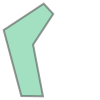

In [78]:
i=10
geometry[i]

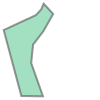

In [79]:
gdf.geometry[i]

In [ ]:
### started 13:35 2021-09-31

In [102]:
gdf = gpd.read_file("/Users/tamarahuete/Documents/HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_fillNA_with_oecm_wdpa_dropnullgeom_simple.shp")

In [108]:
gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,percentage,percent_ir,percent_ra,percent__1,percent_ur,population,majority_l,land_cover,climate_re,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,BadahÅ¡an,None,Velayat,Province,None,AF.BD,...,30.265938,1.09,13.19,65.92,0.00,1.236789e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((70.25101 35.65854, 70.25257 35.66293..."
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,None,Velayat,Province,None,AF.BG,...,0.000000,2.64,65.08,32.29,0.00,6.523502e+05,205,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((62.81617 35.30153, 62.81999 35.30226..."
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,None,Velayat,Province,None,AF.BL,...,3.208203,5.77,23.55,70.21,0.00,1.040738e+06,107,Grassland,Cool Temperate Moist,"POLYGON ((67.39591 35.43840, 67.40628 35.44152..."
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,None,Velayat,Province,None,AF.BK,...,0.000000,19.39,42.97,19.65,0.46,1.312167e+06,201,Sparsley or Non vegetated,Warm Temperate Dry,"POLYGON ((66.56960 36.57032, 66.56117 36.57037..."
4,AFG,Afghanistan,AFG.5_1,Bamyan,None,None,Velayat,Province,None,AF.BM,...,31.462136,0.45,0.00,99.62,0.00,4.321846e+05,142,Grassland,Cool Temperate Dry,"POLYGON ((66.55791 34.42338, 66.57417 34.42561..."


In [104]:
len(gdf)

3866

In [109]:
### delete whole country geometries
gdf.dropna(subset = ["GID_1"], inplace=True)

In [142]:
gdf[gdf['GID_0']=='ESP']['NAME_1'].values[0].encode("latin-1").decode("utf-8")

'Andalucía'

In [146]:
gdf['NAME_1']= gdf['NAME_1'].apply(lambda x: x.encode("latin-1").decode("utf-8"))

In [147]:
gdf[gdf['GID_0']=='ESP']['NAME_1']

856                     Andalucía
857                        Aragón
858                     Cantabria
859            Castilla-La Mancha
860               Castilla y León
861                      Cataluña
862               Ceuta y Melilla
863           Comunidad de Madrid
864    Comunidad Foral de Navarra
865          Comunidad Valenciana
866                   Extremadura
867                       Galicia
868                Islas Baleares
869                Islas Canarias
870                      La Rioja
871                    País Vasco
872        Principado de Asturias
873              Región de Murcia
Name: NAME_1, dtype: object

In [148]:
gdf.rename(columns={'NAME_1':'ID'}, inplace=True)

In [155]:
gdf.to_file("/Users/tamarahuete/Documents/HALF_EARTH/gadm_0_1_simple.shp")